In [1]:
%load_ext autotime

In [58]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import load_img
from tensorflow.keras import layers
from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
! kaggle datasets download -d jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
zip_path = './utkface-new.zip'

from zipfile import ZipFile

with ZipFile(zip_path, mode='r') as zip:
    zip.extractall()
print(f'{str(zip_path)} extracted')

./utkface-new.zip extracted


In [6]:
BASE_DIR = './UTKFace'
age_labels = []
gender_labels = []
image_paths = []

img_files = os.listdir(BASE_DIR)
random.shuffle(img_files)

for img in tqdm(img_files):
    images_path = os.path.join(BASE_DIR, img)
    img_components = img.split('_')
    age_label = int(img_components[0])
    gender_label = int(img_components[1])
    
    age_labels.append(age_label)
    gender_labels.append(gender_label)
    image_paths.append(image_paths)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [9]:
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [10]:
print(f'No. of the age labels: {len(age_labels)}, No. of gender label{len(gender_labels)}, and No. og image path: {len(image_paths)}')

No. of the age labels: 23708, No. of gender label23708, and No. og image path: 23708


In [11]:
gender_dict = {
    1: 'Female',
    0: 'Male'
}

In [12]:
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels

In [13]:
df.head(5)

,image_path,age,gender
0,./UTKFace/64_0_0_20170111203901318.jpg.chip.jpg,64,0
1,./UTKFace/85_1_2_20170110183010789.jpg.chip.jpg,85,1
2,./UTKFace/1_0_2_20161219154038141.jpg.chip.jpg,1,0
3,./UTKFace/40_0_0_20170117142017783.jpg.chip.jpg,40,0
4,./UTKFace/14_0_0_20170117150204180.jpg.chip.jpg,14,0


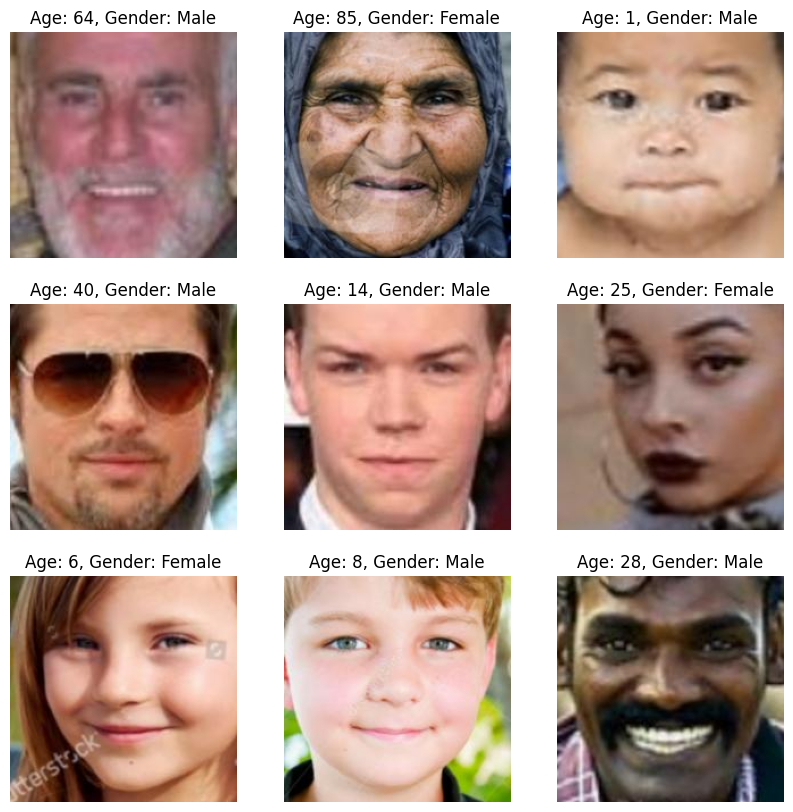

In [31]:
plt.figure(figsize=(10, 10))
samples = df.iloc[0:9]

for idx, sample, age, gender in samples.itertuples():
    plt.subplot(3, 3, idx +1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age}, Gender: {gender_dict[gender]}')
    plt.imshow(img)
plt.show();

In [52]:
def extracted_features(images_path):
    features =list()

    for image in image_paths:
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [53]:
X = extracted_features(df['image_path'])

In [54]:
X.shape

(23708, 128, 128, 1)

In [55]:
X = X / 255.

In [56]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [57]:
INPUT_SHAPE = (128, 128, 1)

In [60]:
inputs = Input((INPUT_SHAPE))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])

2024-03-03 13:40:29.222650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 13:40:29.703856: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 13:40:29.703906: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 13:40:29.707091: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 13:40:29.707163: I external/local_xla/xla/stream_executor

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [62]:
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=50, validation_split=0.2)

: 